# Analyzing COVID-19 Vaccination in the EU/EEA

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. However, some will become seriously ill and require medical attention[1]. On 31 December 2019 WHO’s Country Office in the People’s Republic of China picked up a media statement by the Wuhan Municipal Health Commission from their website on cases of ‘viral pneumonia in Wuhan, People’s Republic of China.


The Country Office notified the International Health Regulations (IHR) focal point in the WHO Western Pacific Regional Office about the Wuhan Municipal Health Commission media statement of the cases and provided a translation of it[2].
The exact date of the outbreak might be blurred but we will cover the timeline from the given information on Vaccination in the European Union and European Economic collected through Area The European Surveillance System (TESSy).



Main objectives of this data analysis to understand the effect of vaccination in Europe and the European Economic Area. Also, try to visualize how vaccination correspondence helped the prevention of spread Covid-19 cases. The data are presented in the Vaccine Tracker and collected through The European Surveillance System (TESSy).


EU/EEA Member States are requested to report basic indicators (number of vaccine doses distributed by manufacturers, number of first, second, additional and unspecified doses administered) and data by target groups at the national level twice a week (every Tuesday and Thursday)[3].


The reference dataset is taken from European Centre for Disease Prevention and Control website and it can be accessed from the given links below: 
https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea 
https://www.ecdc.europa.eu/en/publications-data/download-data-hospital-and-icu-admission-rates-and-current-occupancy-covid-19


### Importing important libraries which will be used during the analysis 

In [253]:
#defining libraries
import numpy as np #Numpy provides multidimensional array objects for easy data manupulation tha pandas uses to store data.
import matplotlib as plt #Matplotlib has powerful data  visualization capabilities that pandas takes advantages of.
import seaborn as sns #Sea born is data package for data visualization.
import pandas as pd #Pandas is data package for data manipulation.
import matplotlib.pyplot as plt

In [254]:
#importing data using pandas.
df = pd.read_csv (r'C:\Users\nadir\Downloads\Data_Camp_UCD_Professional_Academy_Introduction_to_Data_Analsysis\Dataset\COVID-19_vaccination_in_the_EU_EEA.csv')
#print(df)

### Second dataframe wanted to use and merged but since I got memory errors and could not solve it. My computer ram was not enough to elloborate system. To sum up, I put the all the information and quick analysis here as explanation.

In [255]:
#df1 = pd.read_csv(r'C:\Users\nadir\Downloads\Data_Camp_UCD_Professional_Academy_Introduction_to_Data_Analsysis\Dataset\Data_on_hospital_and_ICU_admission_rates_and_current_occupancy_for_COVID-19.csv')
#print(df1)
#to have good vision of out dataset I checked the head of the dataset with head function.
#df1.head()
#I dropped some of the unnecessary columns like I did before for df above to make our data frame more clear and also spare more space at the memory to prevent errors.
#df1 = df1.drop(["source","url","date"], axis=1)
#df1.head(3)
# .info() method display name of colums, data types they contain and if there is any missing values.
#df1.info()
#.shape attribute contains a tuple that holds the number of rows followed by the numbers of colums
#df1.shape
# .describe() method computes some summart statistics for numerical columsn, like mean and median.
#df1.describe()
# .columns attribute contains column names.
#df1.columns
# .index attribute contactins row numbers and row names
#df1.index
# .values attribute contains the data values in a 2 dimensional Numpy array.
#df1.values
#I useed this fucntion to returns the number of missing values in the data set.
#df1.isnull().sum()

### How to merge datasets. As mentioned about after merging jupyter notebook could not eloborated due to memory issue. I just put code as reference

In [256]:
#we will merge two different data frames with using keys so we can do quick and easier analysis.
#merged_data = df.merge(df1, left_on='YearWeekISO', right_on='year_week')

### Exploring dataframe and getting sense of it method and attributes. 

In [257]:
# .head() method I explore dataframe and get sense of its contents.
df.head()

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064
1,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
2,2020-W53,AT,8901064.0,61425.0,0.0,5314,NaN,0,0,0,AT,ALL,COM,8901064
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,NVXD,8901064
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064


In [258]:
#I dropped some of the unnecessary columns to make our data frame more clear and also spare more space at the memory otherwise Jupyter notebook does not allocate and gives error.  
df = df.drop(["Denominator","NumberDosesExported","FirstDoseRefused","FirstDoseRefused","DoseAdditional1","UnknownDose","Region","Vaccine"], axis=1)
df.head(3)

,YearWeekISO,ReportingCountry,NumberDosesReceived,FirstDose,SecondDose,TargetGroup,Population
0,2020-W53,AT,0.0,0,0,ALL,8901064
1,2020-W53,AT,0.0,0,0,ALL,8901064
2,2020-W53,AT,61425.0,5314,0,ALL,8901064


In [259]:
# .info() method display name of colums, data types they contain and if there is any missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250142 entries, 0 to 250141
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YearWeekISO          250142 non-null  object 
 1   ReportingCountry     250142 non-null  object 
 2   NumberDosesReceived  39546 non-null   float64
 3   FirstDose            250142 non-null  int64  
 4   SecondDose           250142 non-null  int64  
 5   TargetGroup          250142 non-null  object 
 6   Population           250142 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 13.4+ MB


In [260]:
#.shape attribute contains a tuple that holds the number of rows followed by the numbers of colums
df.shape

(250142, 7)

In [261]:
# .describe() method computes some summart statistics for numerical columsn, like mean and median. 
df.describe()

,NumberDosesReceived,FirstDose,SecondDose,Population
count,3.954600e+04,2.501420e+05,2.501420e+05,2.501420e+05
mean,4.877819e+04,3.635262e+03,3.292390e+03,1.837243e+07
std,2.332349e+05,3.849631e+04,3.766053e+04,1.914747e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,3.874700e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00,5.525292e+06
50%,0.000000e+00,1.000000e+00,0.000000e+00,5.525292e+06
75%,0.000000e+00,1.580000e+02,6.500000e+01,3.795814e+07
max,8.956098e+06,3.374693e+06,3.067087e+06,8.316671e+07


In [262]:
# .columns attribute contains column names.
df.columns

Index(['YearWeekISO', 'ReportingCountry', 'NumberDosesReceived', 'FirstDose',
       'SecondDose', 'TargetGroup', 'Population'],
      dtype='object')

In [263]:
# .index attribute contactins row numbers and row names
df.index

RangeIndex(start=0, stop=250142, step=1)

In [264]:
# .values attribute contains the data values in a 2 dimensional Numpy array.
df.values

array([['2020-W53', 'AT', 0.0, ..., 0, 'ALL', 8901064],
       ['2020-W53', 'AT', 0.0, ..., 0, 'ALL', 8901064],
       ['2020-W53', 'AT', 61425.0, ..., 0, 'ALL', 8901064],
       ...,
       ['2022-W10', 'SK', 0.0, ..., 0, 'Age80+', 5457873],
       ['2022-W10', 'SK', 0.0, ..., 18, 'Age80+', 5457873],
       ['2022-W10', 'SK', 0.0, ..., 1, 'AgeUNK', 5457873]], dtype=object)

In [265]:
#This function is used to returns the number of missing values in the data set.
df.isnull().sum()

YearWeekISO                 0
ReportingCountry            0
NumberDosesReceived    210596
FirstDose                   0
SecondDose                  0
TargetGroup                 0
Population                  0
dtype: int64

### Sorting and Subsetting our Data Frame

In [266]:
df_sorted = df.sort_values('YearWeekISO',ascending=True)
df_sorted.head(3)

,YearWeekISO,ReportingCountry,NumberDosesReceived,FirstDose,SecondDose,TargetGroup,Population
14707,2020-W50,DK,0.0,2,0,ALL,5822763
14708,2020-W50,DK,0.0,2,0,Age25_49,5822763
14709,2020-W50,DK,0.0,0,0,HCW,5822763


In [267]:
df_sort = df.sort_values('SecondDose',ascending=False)
df_sort.head(3)

,YearWeekISO,ReportingCountry,NumberDosesReceived,FirstDose,SecondDose,TargetGroup,Population
14475,2021-W23,DE,5017182.0,1616925,3067087,ALL,83166711
14484,2021-W24,DE,4619388.0,1684503,2742825,ALL,83166711
14480,2021-W24,DE,NaN,1665354,2581281,1_Age<60,83166711


In [268]:
df_sort_1 = df.sort_values(['NumberDosesReceived','Population'], ascending = [True, False])
df_sort_1.head(3)

,YearWeekISO,ReportingCountry,NumberDosesReceived,FirstDose,SecondDose,TargetGroup,Population
14368,2021-W02,DE,0.0,507629,19729,ALL,83166711
14372,2021-W03,DE,0.0,16443,21,ALL,83166711
14380,2021-W05,DE,0.0,28969,155,ALL,83166711


In [269]:
df_sort_2 = df[['YearWeekISO','ReportingCountry','TargetGroup','Population']]
df_sort_2.head(3)

,YearWeekISO,ReportingCountry,TargetGroup,Population
0,2020-W53,AT,ALL,8901064
1,2020-W53,AT,ALL,8901064
2,2020-W53,AT,ALL,8901064


In [270]:
df[df["ReportingCountry"] == "DE"]
df_test_DE = df[(df["SecondDose"] > 0) & (df["ReportingCountry"] == "DE")]
df_test_DE.head(3)

,YearWeekISO,ReportingCountry,NumberDosesReceived,FirstDose,SecondDose,TargetGroup,Population
14356,2020-W52,DE,NaN,15280,9,1_Age60+,83166711
14357,2020-W52,DE,NaN,9038,10,1_Age<60,83166711
14358,2020-W52,DE,151125.0,24347,19,ALL,83166711


In [271]:
df_test_DE_sort=df_test_DE.sort_values(by='SecondDose', ascending=False)
df_test_DE_sort.head(3)

,YearWeekISO,ReportingCountry,NumberDosesReceived,FirstDose,SecondDose,TargetGroup,Population
14475,2021-W23,DE,5017182.0,1616925,3067087,ALL,83166711
14484,2021-W24,DE,4619388.0,1684503,2742825,ALL,83166711
14480,2021-W24,DE,NaN,1665354,2581281,1_Age<60,83166711


In [272]:
#replace missing values or dropping duplicates.

def df_prep(path):
    new_df = pd.read_scv(path)
    new_df.drop_duplicates(inplace=True)
    new_df.fillna("Unknown", Inplace=True)
    print(new_df)

In [273]:
#Doing some analysis to retreive mean / median for population and count values
df_analysis = df["Population"]
np_analysis = np.array(df_analysis)
df_analysis_mean = np.mean(np_analysis)
df_analysis_median = np.median(np_analysis)
print(df['ReportingCountry'].value_counts()) #tried to find patterns within the data for doing some analysis
print(df.count())
print(df_analysis_mean)
print(df_analysis_median)
print(df_analysis_total)

FI    99840
PL    60775
FR    10405
IT     6502
EL     5199
PT     4713
AT     4536
HR     4500
LT     4233
SE     4129
ES     3780
HU     3549
LV     3080
IS     2878
LU     2808
BE     2595
MT     2532
CZ     2495
BG     2442
DK     2403
CY     2288
IE     2223
EE     2172
RO     2141
NO     1865
SK     1706
SI     1692
LI     1680
NL      630
DE      351
Name: ReportingCountry, dtype: int64
YearWeekISO            250142
ReportingCountry       250142
NumberDosesReceived     39546
FirstDose              250142
SecondDose             250142
TargetGroup            250142
Population             250142
dtype: int64
18372430.044934478
5525292.0
4595716396300


In [274]:
#Data frame grouped by Reporting country to access population for each country since it was repeating with the update of data for each weeks.Therefore I grouped then under reporting country. 
df_population_1 = df.drop_duplicates().groupby('ReportingCountry').count()
df_population_1.head(100)

,YearWeekISO,NumberDosesReceived,FirstDose,SecondDose,TargetGroup,Population
ReportingCountry,,,,,,
AT,3761,3761,3761,3761,3761,3761
BE,2241,229,2241,2241,2241,2241
BG,2253,228,2253,2253,2253,2253
CY,2134,2134,2134,2134,2134,2134
CZ,2490,234,2490,2490,2490,2490
DE,351,225,351,351,351,351
DK,2237,2237,2237,2237,2237,2237
EE,2088,2088,2088,2088,2088,2088
EL,4338,4338,4338,4338,4338,4338


In [275]:
#I grouped again eporting country here but this time I sum all the information Then I will use it for quick straightforward mathematical calculation.
df_population_2= df.drop_duplicates().groupby('ReportingCountry').sum()
df_population_2.head(100)

,NumberDosesReceived,FirstDose,SecondDose,Population
ReportingCountry,,,,
AT,387777840.0,13613905,12456001,33476901704
BE,25392935.0,18102150,17045723,25821788040
BG,8327420.0,4206621,3126593,15661688946
CY,2419628.0,1326863,1267683,1895002670
CZ,23473895.0,14368977,13342848,26627908110
DE,211568853.0,120776846,118428969,29191515561
DK,9210270.0,9486034,9353098,13025520831
EE,2660820.0,1648335,1483392,2774901888
EL,443298680.0,23860622,21365553,46497134970


In [276]:
#straightforward mathematical calculations to find and create a new data set with individual population, total  number of doses received, first and second doses.
df_population_3 = df_population_2/df_population_1
df_population_3.head()

,FirstDose,NumberDosesReceived,Population,SecondDose,TargetGroup,YearWeekISO
ReportingCountry,,,,,,
AT,3619.756714,103104.982717,8901064.0,3311.885403,NaN,NaN
BE,8077.710843,110886.179039,11522440.0,7606.302097,NaN,NaN
BG,1867.119840,36523.771930,6951482.0,1387.746560,NaN,NaN
CY,621.772727,1133.846298,888005.0,594.040769,NaN,NaN
CZ,5770.673494,100315.790598,10693939.0,5358.573494,NaN,NaN


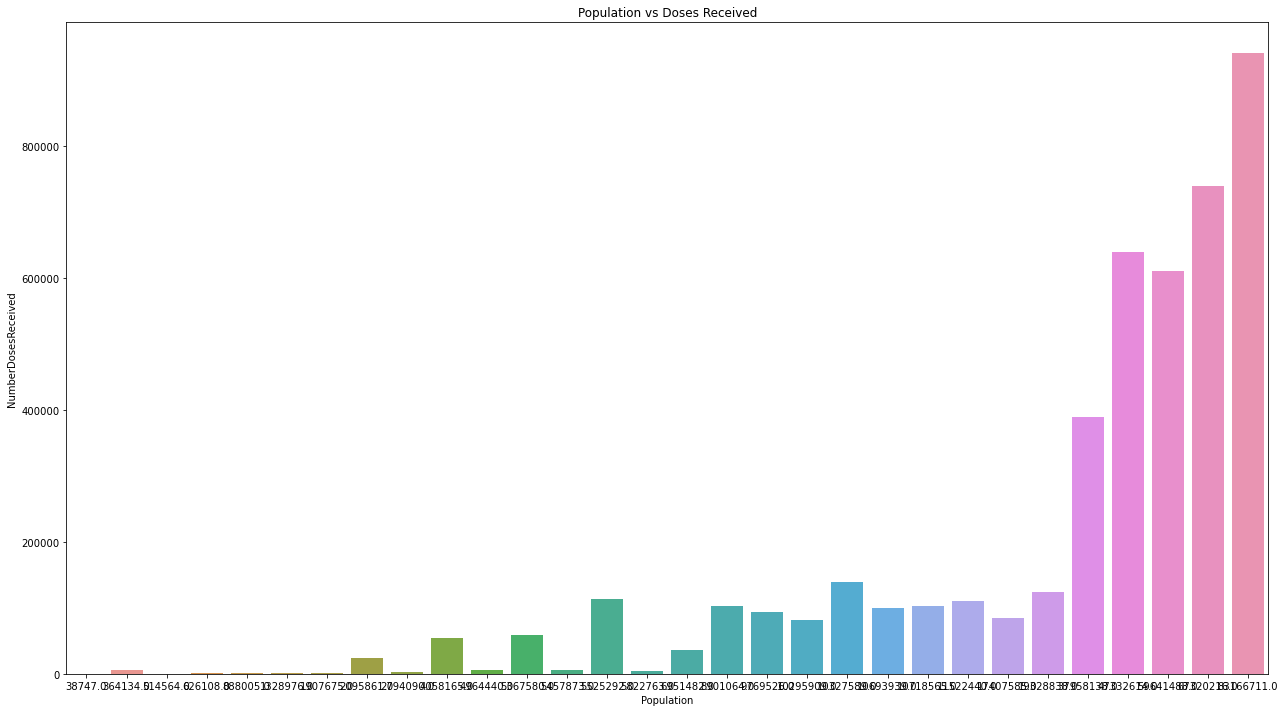

In [277]:
#with this figure I tried to visualize coralation between population and number of doses received. It can be clearly shown that whne the population increase number of doses received increases. 
plt.figure(figsize=(18,10))
sns.set_color_codes("pastel")
sns.barplot(x = "Population" , y = "NumberDosesReceived" , data=df_population_3)
plt.title("Population vs Doses Received")
plt.tight_layout()
plt.show()   

In [278]:
#for index, rows in df.iterrows():
   # print(str(rows['ReportingCountry']).split(",")[0])

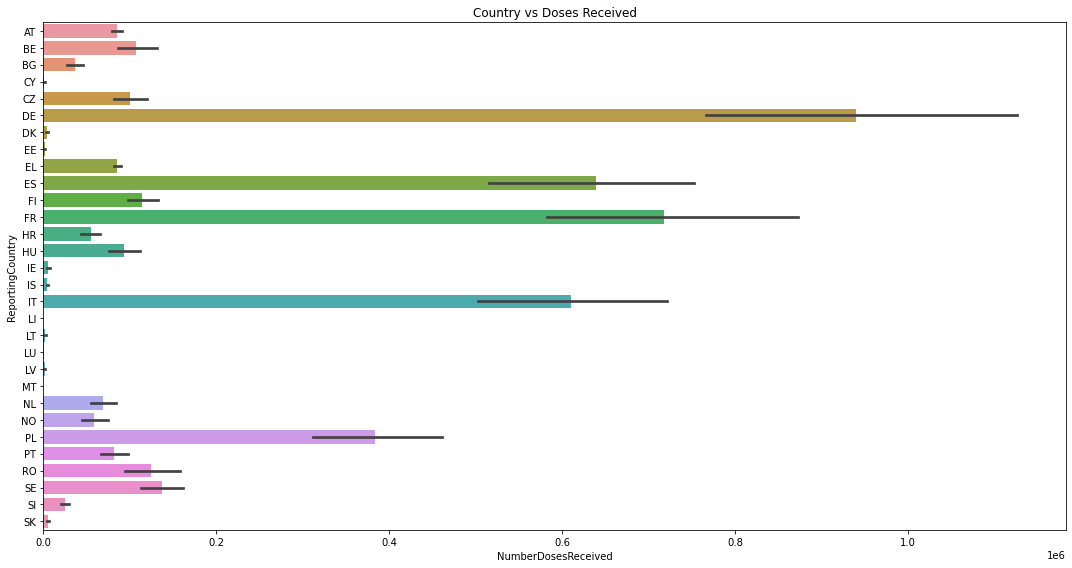

In [279]:
#This figure shows that top 5 countries where received highest number of doses received are Germany, Spain, France, Italy and Poland. With this figure I am aiming to access the top 5 countries so I can check hospital admission numbers for these countries over the same period of time 
plt.figure(figsize=(15,8))
sns.set_color_codes("pastel")
sns.barplot(x =  "NumberDosesReceived", y = "ReportingCountry" , data=df)
plt.title("Country vs Doses Received")
plt.tight_layout()
plt.show()               

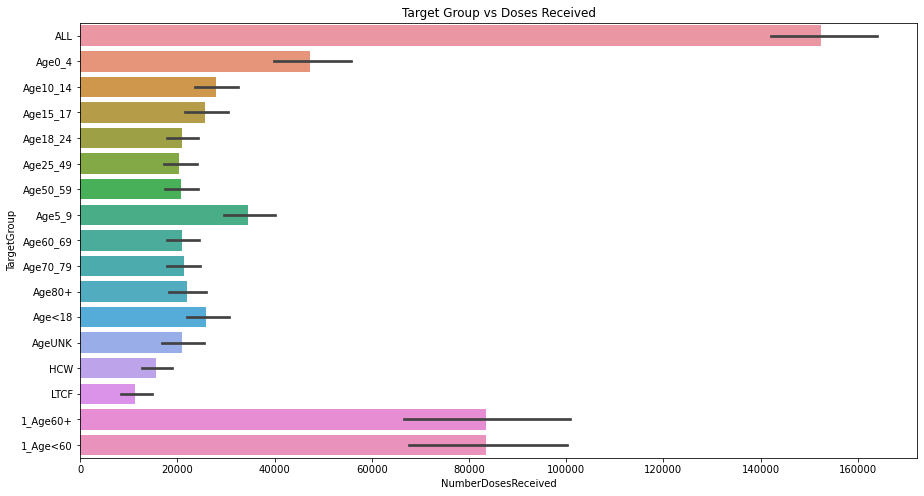

In [285]:
#with this figure I aimed ot understand total number of doses distribution over the different target groups. Being honest I was expecting 60+ target group would be highest number since European againg group such as 60+ is 20 percent of the whole population. Accodring to tweet of EuroStat In 2021, more than one fifth (20.8 %) of the EU population was aged 65 and over. Contrary highest rate of dose received is age 0-4 age. It can be truly interesting topic for further analysis.[4],[5]
plt.figure(figsize=(15,8))
sns.set_color_codes("pastel")
sns.barplot(x = "NumberDosesReceived" , y = "TargetGroup" , data=df)
plt.title("Target Group vs Doses Received")
plt.show()

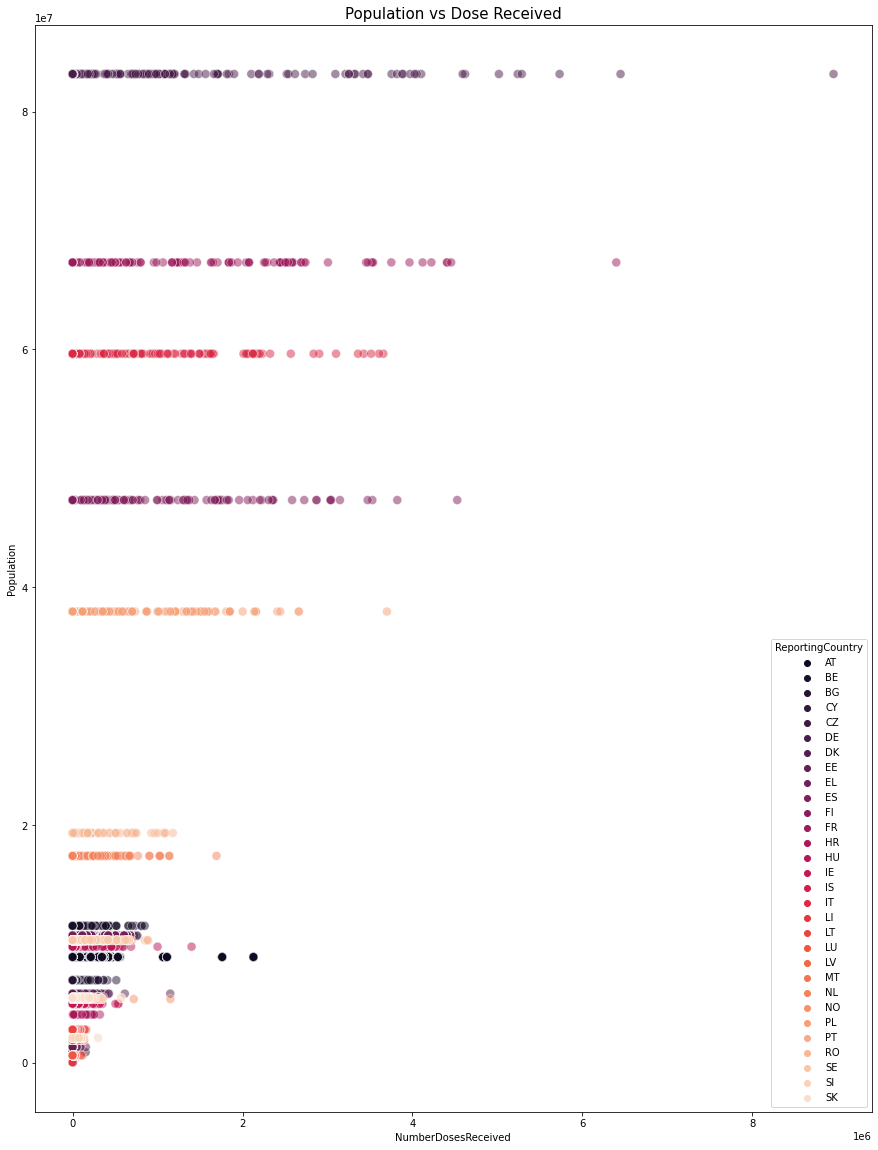

In [281]:
#scatter plot can be used either when one continuous variable is under the control of the experimenter and the other depends on it or when both continuous variables are independent. If a parameter exists that is systematically incremented and/or decremented by the other, it is called the control parameter or independent variable and is customarily plotted along the horizontal axis. The measured or dependent variable is customarily plotted along the vertical axis. If no dependent variable exists, either type of variable can be plotted on either axis and a scatter plot will illustrate only the degree of correlation (not causation) between two variables. To sum up, it seems there is no correlation in between the dataset.
plt.figure(figsize=(15,20))
sns.scatterplot(x='NumberDosesReceived', y='Population', hue='ReportingCountry', data=df, alpha=.5, palette='rocket',s=80);
plt.title("Population vs Dose Received", fontsize="15")
plt.show()

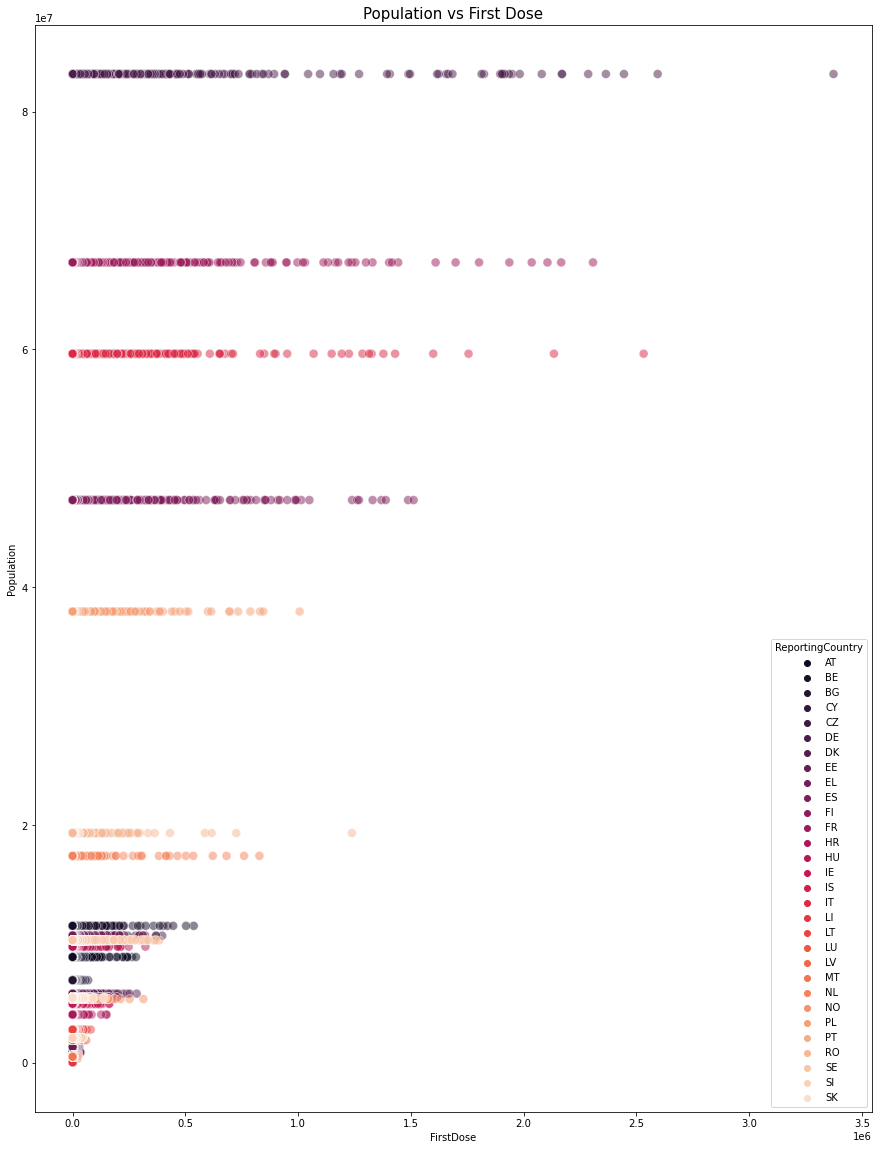

In [282]:
plt.figure(figsize=(15,20))
sns.scatterplot(x='FirstDose', y='Population', hue='ReportingCountry', data=df, alpha=.5, palette='rocket',s=80);
plt.title("Population vs First Dose", fontsize="15")
plt.show()

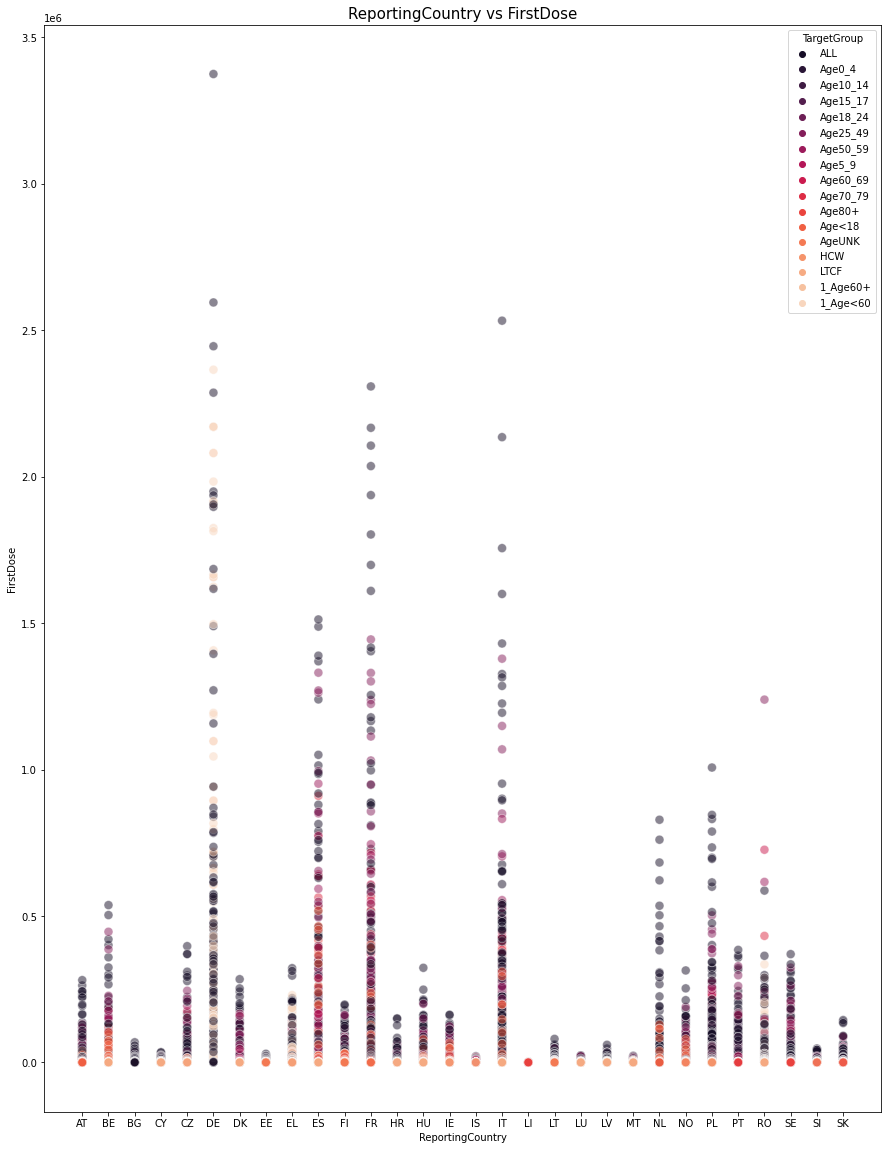

In [283]:
##scatter plot can be used either when one continuous variable is under the control of the experimenter and the other depends on it or when both continuous variables are independent. If a parameter exists that is systematically incremented and/or decremented by the other, it is called the control parameter or independent variable and is customarily plotted along the horizontal axis. The measured or dependent variable is customarily plotted along the vertical axis. If no dependent variable exists, either type of variable can be plotted on either axis and a scatter plot will illustrate only the degree of correlation (not causation) between two variables. To sum up, it seems there is no correlation in between the dataset.
plt.figure(figsize=(15,20))
sns.scatterplot(x='ReportingCountry', y='FirstDose', hue='TargetGroup', data=df, alpha=.5, palette='rocket',s=80);
plt.title("ReportingCountry vs FirstDose", fontsize="15")
plt.show()

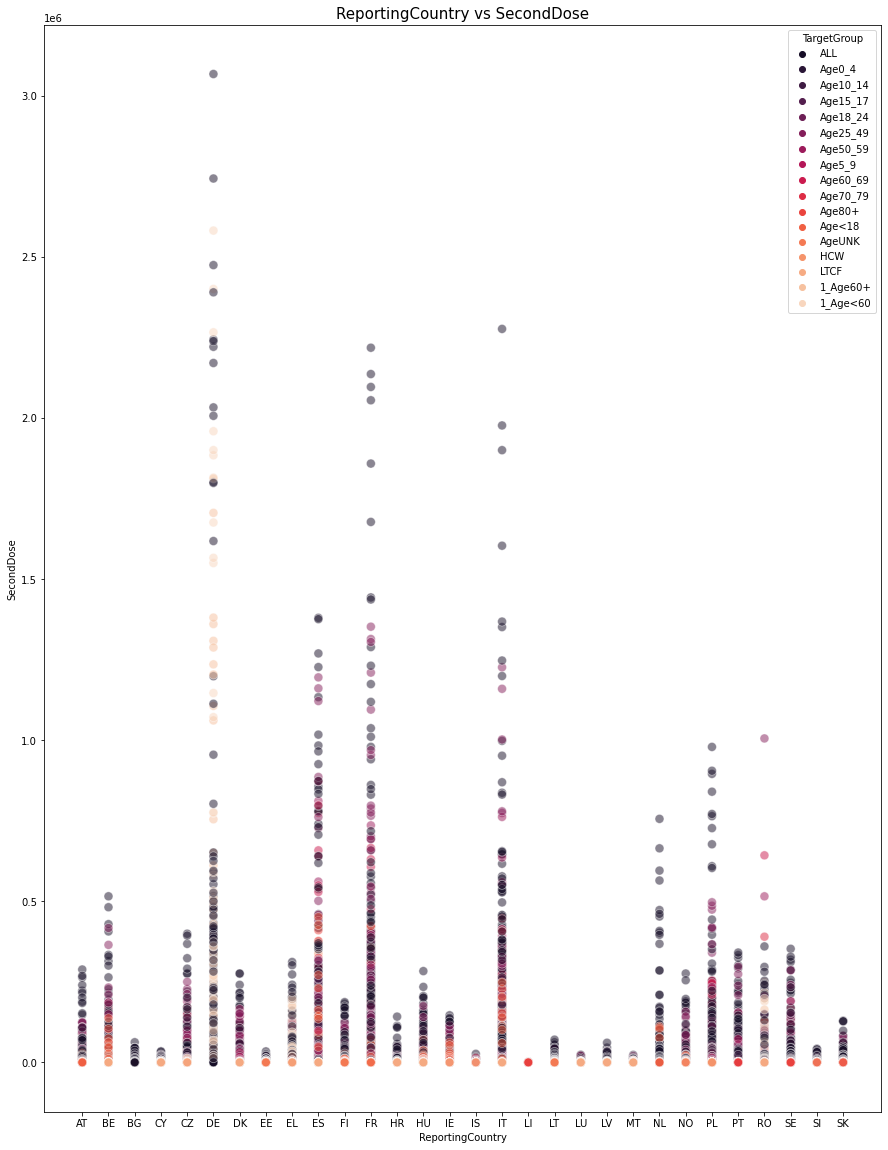

In [284]:
#scatter plot can be used either when one continuous variable is under the control of the experimenter and the other depends on it or when both continuous variables are independent. If a parameter exists that is systematically incremented and/or decremented by the other, it is called the control parameter or independent variable and is customarily plotted along the horizontal axis. The measured or dependent variable is customarily plotted along the vertical axis. If no dependent variable exists, either type of variable can be plotted on either axis and a scatter plot will illustrate only the degree of correlation (not causation) between two variables. To sum up, it seems there is no correlation in between the dataset.
plt.figure(figsize=(15,20))
sns.scatterplot(x='ReportingCountry', y='SecondDose', hue='TargetGroup', data=df, alpha=.5, palette='rocket',s=80);
plt.title("ReportingCountry vs SecondDose", fontsize="15")
plt.show()